In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#web-scraping to gather data
url1 = 'https://en.wikipedia.org/wiki/202'
url2 = '%E2%80%932'
url3 = '_La_Liga'

dataframes = []

for i in range(4):
    if(i == 2):
        break
    url = url1 + str(i) + url2 + str(i + 1) + url3
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    league_table_header = soup.find('h2', id='League_table')
    table = league_table_header.find_next('table')

    headers = ['Name', 'Test', 'TN']
    count = 0
    for th in table.find_all('th'):
        if(count < 10):
            headers.append(th.text.strip())
            count += 1

    data = []
    for row in table.find_all('tr'):
        cols = row.find_all(['td', 'a'])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    #organizing data into dataframe
    df = pd.DataFrame(data, columns=headers)
    df = df.rename(columns={'Teamvte': 'Team'})
    df = df.shift(axis=1, periods=3)
    df = df.drop(['Name', 'Test', 'TN'], axis=1)
    df = df.dropna()

    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

numeric_columns = ['Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
combined_df[numeric_columns] = combined_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

aggregated_df = combined_df.groupby('Team').agg({
    'Pld': 'sum',
    'W': 'sum',
    'D': 'sum',
    'L': 'sum',
    'GF': 'sum',
    'GA': 'sum'
}).reset_index()

print(aggregated_df)

#aggregated_df.to_csv('la_liga_statistics.csv', index=False)

/Users/brunoinzunza/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


               Team  Pld   W   D   L   GF   GA
0            Alavés   76  17  18  41   67  122
1   Athletic Bilbao   76  25  26  25   89   78
2   Atlético Madrid   76  47  16  13  132   68
3         Barcelona   76  45  17  14  153   76
4        Celta Vigo   76  26  21  29   98  100
5             Cádiz   76  19  26  31   71  109
6             Eibar   38   6  12  20   29   52
7             Elche   76  19  21  36   74  107
8          Espanyol   38  10  12  16   40   53
9            Getafe   76  17  26  33   61   84
10          Granada   76  21  21  34   91  126
11           Huesca   38   7  13  18   34   53
12          Levante   76  17  25  34   97  133
13         Mallorca   38  10   9  19   36   63
14          Osasuna   76  23  22  31   74   99
15   Rayo Vallecano   38  11   9  18   39   50
16       Real Betis   76  36  18  22  112   90
17      Real Madrid   76  51  17   8  147   59
18    Real Sociedad   76  34  22  20   99   75
19          Sevilla   76  42  21  13  106   63
20         Va

In [38]:
import pandas as pd
import numpy as np
import csv

# Load data from CSV
datafile = open('la_liga_statistics.csv', 'r')
datareader = csv.reader(datafile)
data = []
for row in datareader:
    data.append(row)

#cleaning up and preparing data
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df[1:]
for col in df:
    if(col != 'Team'):
        df[col] = pd.to_numeric(df[col], errors='coerce')
df

,Team,Pld,W,D,L,GF,GA
1,Alavés,76,17,18,41,67,122
2,Athletic Bilbao,76,25,26,25,89,78
3,Atlético Madrid,76,47,16,13,132,68
4,Barcelona,76,45,17,14,153,76
5,Celta Vigo,76,26,21,29,98,100
6,Cádiz,76,19,26,31,71,109
7,Eibar,38,6,12,20,29,52
8,Elche,76,19,21,36,74,107
9,Espanyol,38,10,12,16,40,53
10,Getafe,76,17,26,33,61,84


In [43]:
#Percent of Matches won by team
df["Win Percentage"] = (df['W'] / df['Pld']) * 100
df[['Team', 'Win Percentage']]

,Team,Win Percentage
1,Alavés,22.368421
2,Athletic Bilbao,32.894737
3,Atlético Madrid,61.842105
4,Barcelona,59.210526
5,Celta Vigo,34.210526
6,Cádiz,25.000000
7,Eibar,15.789474
8,Elche,25.000000
9,Espanyol,26.315789
10,Getafe,22.368421


In [44]:
#Goal Difference per team
df["GD"] = df['GF'] - df['GA']
df[['Team', 'GD']]

,Team,GD
1,Alavés,-55
2,Athletic Bilbao,11
3,Atlético Madrid,64
4,Barcelona,77
5,Celta Vigo,-2
6,Cádiz,-38
7,Eibar,-23
8,Elche,-33
9,Espanyol,-13
10,Getafe,-23


In [47]:
#Goals per match, Goals Conceded per match, Expected Goal difference per match
df["G per Match"] = df['GF'] / df['Pld']
df["G Conceded per Match"] = df['GA'] / df['Pld']
df["Expected GD per Match"] = df['G per Match'] - df['G Conceded per Match']
df[['Team', 'G per Match', 'G Conceded per Match', 'Expected GD per Match']]

,Team,G per Match,G Conceded per Match,Expected GD per Match
1,Alavés,0.881579,1.605263,-0.723684
2,Athletic Bilbao,1.171053,1.026316,0.144737
3,Atlético Madrid,1.736842,0.894737,0.842105
4,Barcelona,2.013158,1.000000,1.013158
5,Celta Vigo,1.289474,1.315789,-0.026316
6,Cádiz,0.934211,1.434211,-0.500000
7,Eibar,0.763158,1.368421,-0.605263
8,Elche,0.973684,1.407895,-0.434211
9,Espanyol,1.052632,1.394737,-0.342105
10,Getafe,0.802632,1.105263,-0.302632


0          GF        GA        GD       Pld         W         D         L
0                                                                        
GF   1.000000  0.247193  0.776359  0.778887  0.934414  0.422919 -0.202095
GA   0.247193  1.000000 -0.418820  0.664929  0.014761  0.659747  0.850606
GD   0.776359 -0.418820  1.000000  0.297414  0.866086 -0.032811 -0.742694
Pld  0.778887  0.664929  0.297414  1.000000  0.684173  0.794592  0.379258
W    0.934414  0.014761  0.866086  0.684173  1.000000  0.254480 -0.380790
D    0.422919  0.659747 -0.032811  0.794592  0.254480  1.000000  0.515001
L   -0.202095  0.850606 -0.742694  0.379258 -0.380790  0.515001  1.000000


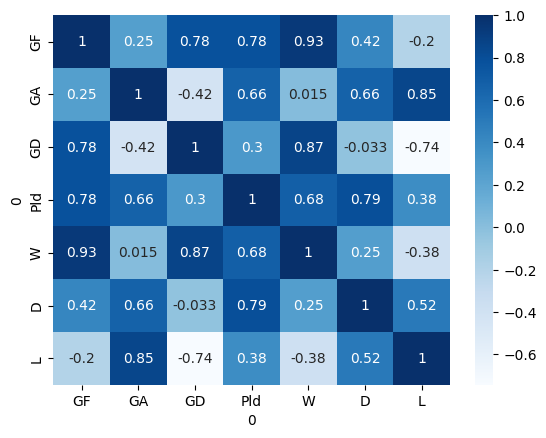

In [80]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['GF', 'GA', 'GD', 'Pld', 'W', 'D', 'L']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

In [91]:
#multivariate linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['GF', 'GA', 'GD', 'Pld']]
y = df['W'] 
teams = df['Team'] 

X_train, X_test, y_train, y_test, teams_train, teams_test = train_test_split(X, y, teams, test_size=0.2, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Evaluation:")
for team, actual, predicted in zip(teams_test, y_test, y_pred):
    print(f"Team: {team}, Actual Matches Won: {actual}, Predicted Matches Won: {predicted}")


Evaluation:
Team: Valencia, Actual Matches Won: 21, Predicted Matches Won: 25.80712150248798
Team: Real Madrid, Actual Matches Won: 51, Predicted Matches Won: 48.40572271919304
Team: Barcelona, Actual Matches Won: 45, Predicted Matches Won: 46.80630539281418
Team: Mallorca, Actual Matches Won: 10, Predicted Matches Won: 6.102755445872109
Team: Sevilla, Actual Matches Won: 42, Predicted Matches Won: 36.27567779965712
